# Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [2]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [3]:
from sklearn import neighbors
n_neighbors = 11
# weights = uniform, significa pesi uniformi
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
# Gli score sono l'accuratezza delle 5 run di k-nn sugli esempi del training set
print(scores)
# shows the model predictions  
for i in range(len(iris.target)):
    print(iris.data[i,:])
    print(iris.data[i,:].reshape(1,-1))
    instance=iris.data[i,:].reshape(1,-1)
    #print(clf_knn.predict(instance))
    predicted=clf_knn.predict(instance)[0]
    print(predicted)
    if iris.target[i]==predicted:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

[0.93333333 1.         1.         0.96666667 1.        ]
[5.1 3.5 1.4 0.2]
[[5.1 3.5 1.4 0.2]]
0
0 ok setosa
[4.9 3.  1.4 0.2]
[[4.9 3.  1.4 0.2]]
0
1 ok setosa
[4.7 3.2 1.3 0.2]
[[4.7 3.2 1.3 0.2]]
0
2 ok setosa
[4.6 3.1 1.5 0.2]
[[4.6 3.1 1.5 0.2]]
0
3 ok setosa
[5.  3.6 1.4 0.2]
[[5.  3.6 1.4 0.2]]
0
4 ok setosa
[5.4 3.9 1.7 0.4]
[[5.4 3.9 1.7 0.4]]
0
5 ok setosa
[4.6 3.4 1.4 0.3]
[[4.6 3.4 1.4 0.3]]
0
6 ok setosa
[5.  3.4 1.5 0.2]
[[5.  3.4 1.5 0.2]]
0
7 ok setosa
[4.4 2.9 1.4 0.2]
[[4.4 2.9 1.4 0.2]]
0
8 ok setosa
[4.9 3.1 1.5 0.1]
[[4.9 3.1 1.5 0.1]]
0
9 ok setosa
[5.4 3.7 1.5 0.2]
[[5.4 3.7 1.5 0.2]]
0
10 ok setosa
[4.8 3.4 1.6 0.2]
[[4.8 3.4 1.6 0.2]]
0
11 ok setosa
[4.8 3.  1.4 0.1]
[[4.8 3.  1.4 0.1]]
0
12 ok setosa
[4.3 3.  1.1 0.1]
[[4.3 3.  1.1 0.1]]
0
13 ok setosa
[5.8 4.  1.2 0.2]
[[5.8 4.  1.2 0.2]]
0
14 ok setosa
[5.7 4.4 1.5 0.4]
[[5.7 4.4 1.5 0.4]]
0
15 ok setosa
[5.4 3.9 1.3 0.4]
[[5.4 3.9 1.3 0.4]]
0
16 ok setosa
[5.1 3.5 1.4 0.3]
[[5.1 3.5 1.4 0.3]]
0
17 ok setosa

In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [4]:
n_neighbors = 11
# Adesso usiamo dei pesi dei vicini variabili che dipendono dalla distanza
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

# Qua si vede che tramite il classificatore con i vicini che dipendono dalla distanza non si fanno errori
# mentre nella cross validation può fare errori perchè i vicini sono ridotti (perchè c'è anche il test set)

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

C:\Users\lores\AppData\Local\Temp\ipykernel_14472\623285509.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.91666666

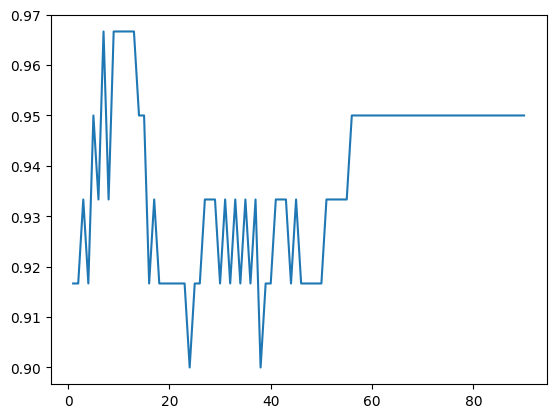

In [5]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

# Separa training e test in maniera casuale
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Facciamo il loop iniziando come valore di k = 0 e facciamo il loop per trovare il miglior valore di k
best_accuracy=0
best_k=1

# Inizializza a zero un vettore della lunghezza del training set e serve per memorizzare un valore ad ogni indice
# che rappresenta il numero di k possibile ed in corrispondenza ci assegniamo l'accuratezza. Ci memorizza le accuratezze
# e l'indice di questo vettore è il numero k.
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

# il valore di k variava da 1 fino al numero di esempi di training set
plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333


C:\Users\lores\AppData\Local\Temp\ipykernel_14472\1723528131.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k neighbors=26
accuracy=0.8833333333333333
k neighbors=27
accuracy=0.9
k neighbors=28
accuracy=0.8833333333333333
k neighbors=29
accuracy=0.9
k neighbors=30
accuracy=0.8666666666666667
k neighbors=31
accuracy=0.9
k neighbors=32
accuracy=0.8666666666666667
k neighbors=33
accuracy=0.8833333333333333
k neighbors=34
accuracy=0.8666666666666667
k neighbors=35
accuracy=0.8833333333333333
k neighbors=36
accuracy=0.8666666666666667
k neighbors=37
accuracy=0.8833333333333333
k neighbors=38
accuracy=0.8666666666666667
k neighbors=39
accuracy=0.8666666666666667
k neighbors=40
accuracy=0.8666666666666667
k neighbors=41
accuracy=0.8333333333333334
k neighbors=42
accuracy=0.8166666666666667
k neighbors=43
accuracy=0.8166666666666667


C:\Users\lores\AppData\Local\Temp\ipykernel_14472\1723528131.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


k neighbors=29
accuracy=0.9333333333333333
k neighbors=30
accuracy=0.9166666666666666
k neighbors=31
accuracy=0.9333333333333333
k neighbors=32
accuracy=0.9166666666666666
k neighbors=33
accuracy=0.9333333333333333
k neighbors=34
accuracy=0.9166666666666666
k neighbors=35
accuracy=0.9333333333333333
k neighbors=36
accuracy=0.9166666666666666
k neighbors=37
accuracy=0.9333333333333333
k neighbors=38
accuracy=0.9
k neighbors=39
accuracy=0.9166666666666666
k neighbors=40
accuracy=0.9166666666666666
k neighbors=41
accuracy=0.9333333333333333
k neighbors=42
accuracy=0.9333333333333333
k neighbors=43
accuracy=0.9333333333333333
k neighbors=44
accuracy=0.9166666666666666
k neighbors=45
accuracy=0.9333333333333333
k neighbors=46
accuracy=0.9166666666666666
k neighbors=47
accuracy=0.9166666666666666
k neighbors=48
accuracy=0.9166666666666666
k neighbors=49
accuracy=0.9166666666666666
k neighbors=50
accuracy=0.9166666666666666
k neighbors=51
accuracy=0.9333333333333333
k neighbors=52
accuracy=0.

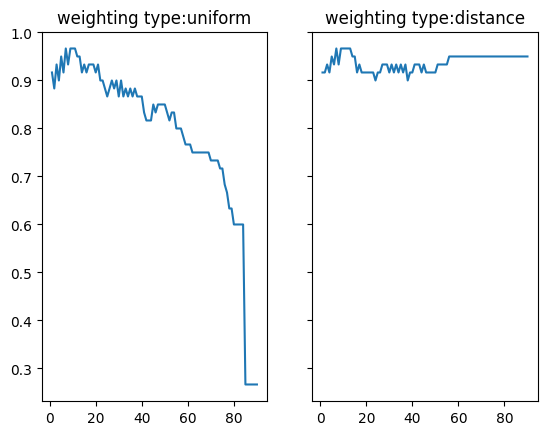

In [6]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

C:\Users\lores\AppData\Local\Temp\ipykernel_14472\1612611206.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing



 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

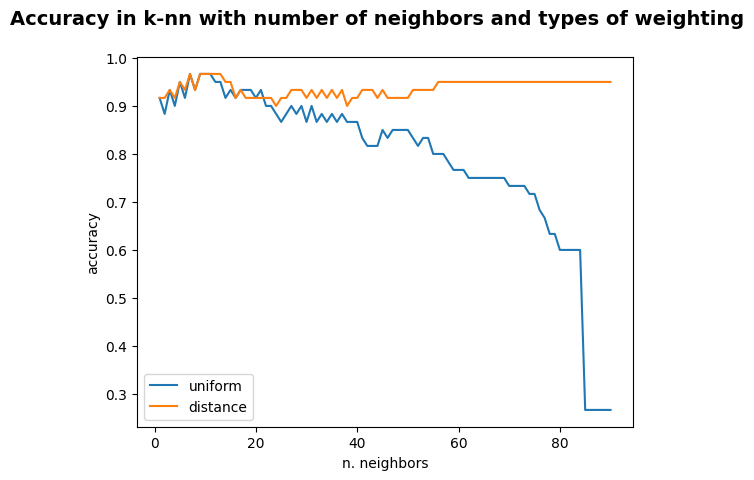

In [7]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.


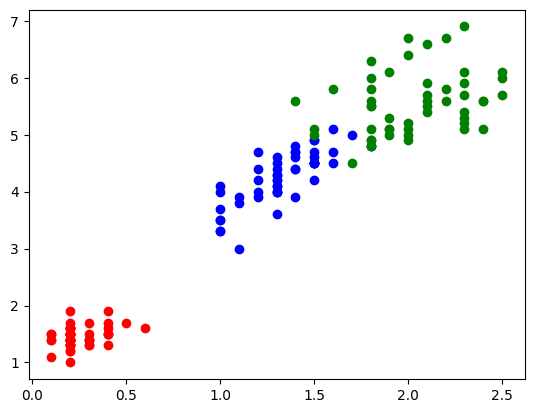

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import feature_selection
iris = load_iris()
import numpy as np

arrayMutual = feature_selection.mutual_info_classif(iris.data, iris.target)
ind = np.argpartition(arrayMutual, 2)[2:]
color = ['red', 'blue', 'green']

for example in range(len(iris.data)):
    plt.scatter(iris.data[example, ind[0]], iris.data[example, ind[1]], c=color[iris.target[example]])

# What you have to do:

## 1. Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation

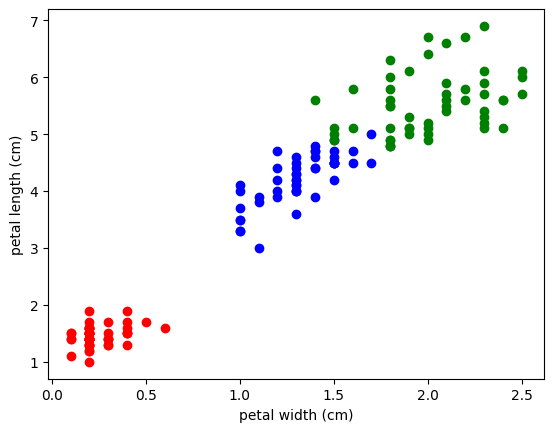

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import feature_selection
from sklearn import neighbors
iris = load_iris()
import numpy as np

clf_knn = neighbors.KNeighborsClassifier(7, weights='uniform')
clf_knn.fit(iris.data, iris.target)
clf_knn_predicted = clf_knn.predict(iris.data)

# Calcoliamo quanto sono dipendenti le variabili delle features categoriche, tramite la Mutual Information.
# Questo valore è collegato al concetto di Entropia ed è conosciuto come la riduzione di incertezza di una variabile casuale.
# Perciò, se due variabili sono indipendenti, la loro MI sarà nulla.
# In questo caso, la MI è calcolata tra le features e la variabile target.
# Vogliamo che la MI sia alta per avere la minor incertezza possibile, perciò selezioniamo le features con MI più alta.
arrayMutual = feature_selection.mutual_info_classif(iris.data, clf_knn_predicted)

# Selezioniamo le due variabili più dipendenti
# Argpartition restituisce gli indici degli elementi ordinati facendo la partizione dall'elemento con indice 2: prima mette quelli più piccoli e dopo quelli più grandi
# mantenendo l'elemento con indice 2 in posizione 2.
ind = np.argpartition(arrayMutual, 2)[2:]
color = ['red', 'blue', 'green']

plt.xlabel(iris.feature_names[ind[0]])
plt.ylabel(iris.feature_names[ind[1]])

for example in range(len(iris.data)):
    plt.scatter(iris.data[example, ind[0]], iris.data[example, ind[1]], c=color[clf_knn_predicted[example]])

## 2. Plot the ROC plot of the k-nn (for the best value of k) for each of the three classes: setosa, virginica and versicolor

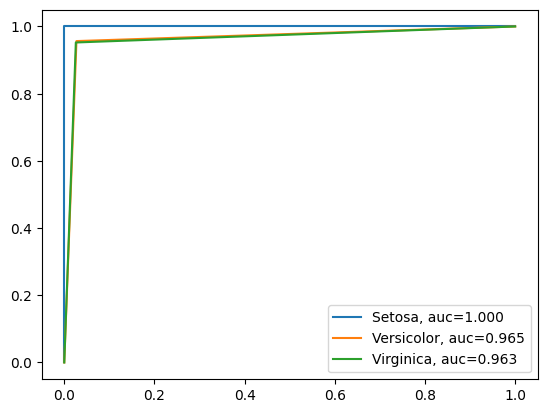

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import neighbors
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

iris = load_iris()

# Dividiamo training e test set in maniera casuale: test set del 40% e training set del 60%
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Creiamo il classificatore
clf_knn = neighbors.KNeighborsClassifier(7, weights='uniform')

# Addestriamo il classificatore
clf_knn.fit(X_train, y_train)

# Prevediamo i valori del test set
clf_knn_predicted = clf_knn.predict(X_test)

# Calcoliamo l'accuracy e plottiamo la curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test==0, clf_knn_predicted==0)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,label="Setosa, auc=%.3f" % float(roc_auc))

fpr, tpr, thresholds = metrics.roc_curve(y_test==1, clf_knn_predicted==1)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,label="Versicolor, auc=%.3f" % float(roc_auc))

fpr, tpr, thresholds = metrics.roc_curve(y_test==2, clf_knn_predicted==2)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,label="Virginica, auc=%.3f" % float(roc_auc))

plt.legend(loc=0)

# Non viene commesso nessun errore su Setosa e di conseguenza la curva arriva al roc heaven e poi va tutta a destra
# Viene commesso un errore su Versicolor in quanto un esempio di tale classe viene predetto della classe Virginica e c'è un FP
# Viene commesso un errore su Virginica in quanto un esempio di tale classe viene predetto della classe Versicolor e c'è un FP

## 3. Plot the ROC plot for the best decision tree you trained in Exercize n.1 

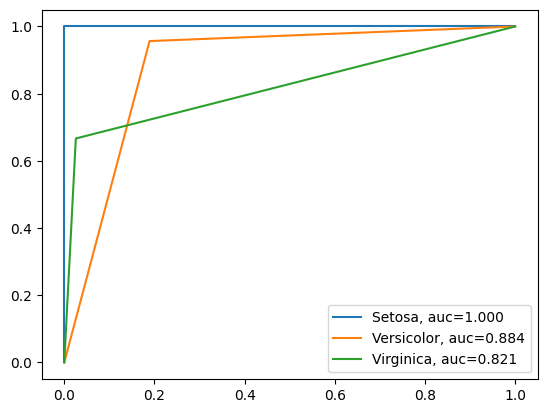

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()

# Utilizziamo il decision tree dell'esercizio 1 con criterio di Entropia con i vari parametri per ridurre l'overfitting
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,max_leaf_nodes=3,min_impurity_decrease=0.2,max_depth=2,class_weight={0:1,1:1,2:1})

clf = clf.fit(X_train, y_train)

predicted_y_test = clf.predict(X_test)

plt.figure(0).clf()

fpr,tpr,thereholds = metrics.roc_curve(y_test==0, predicted_y_test==0)

auc = metrics.roc_auc_score(y_test==0, predicted_y_test==0)
plt.plot(fpr,tpr,label="Setosa, auc=%.3f" % float(auc))

fpr,tpr,thereholds = metrics.roc_curve(y_test==1, predicted_y_test==1)

auc = metrics.roc_auc_score(y_test==1, predicted_y_test==1)
plt.plot(fpr,tpr,label="Versicolor, auc=%.3f" % float(auc))

fpr,tpr,thereholds = metrics.roc_curve(y_test==2, predicted_y_test==2)


auc = metrics.roc_auc_score(y_test==2, predicted_y_test==2)
plt.plot(fpr,tpr,label="Virginica, auc=%.3f" % float(auc))

plt.legend(loc=0)

# Non viene commesso nessun errore su Setosa e di conseguenza la curva arriva al roc heaven e poi va tutta a destra
# Viene commesso un errore su Versicolor in quanto un esempio di tale classe viene predetto della classe Virginica e ci sono 7 FP
# Vengono commessi 7 errori su Virginica in quanto 7 esempi di tale classe vengono predetti della classe Versicolor e c'è un FP

## 4. Compare decision trees and k-nn on the ROC space: for which values of (TPR,FPR) k-nn is better than decision trees?

In [12]:
## Divido il dataset in training e test set
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

Text(0.5, 1.0, 'KNN')

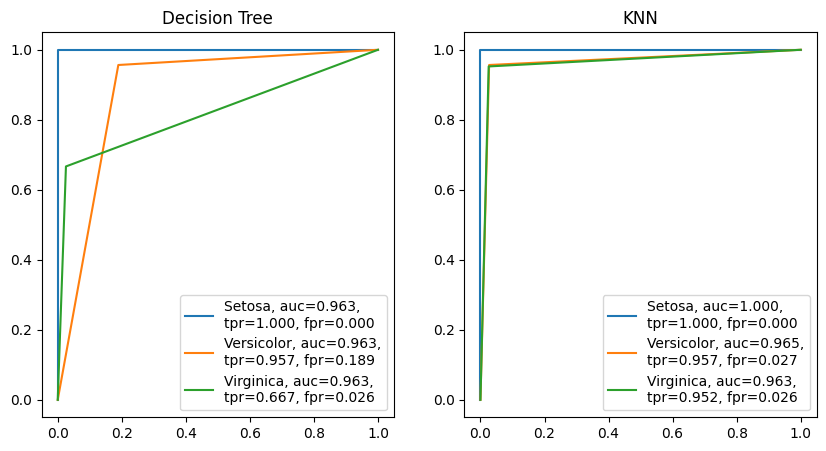

In [13]:
## Preparo la figura da plottare con le curve ROC
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

## Plot the decision tree
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,max_leaf_nodes=3,min_impurity_decrease=0.2,max_depth=2,class_weight={0:1,1:1,2:1})

clf = clf.fit(X_train, y_train)

predicted_y_test = clf.predict(X_test)

fpr,tpr,thereholds = metrics.roc_curve(y_test==0, predicted_y_test==0)

auc = metrics.roc_auc_score(y_test==0, predicted_y_test==0)
ax1.plot(fpr,tpr,label="Setosa, auc=%.3f,\ntpr=%.3f, fpr=%.3f" % (float(roc_auc), float(tpr[1]), float(fpr[1])))

fpr,tpr,thereholds = metrics.roc_curve(y_test==1, predicted_y_test==1)

auc = metrics.roc_auc_score(y_test==1, predicted_y_test==1)
ax1.plot(fpr,tpr,label="Versicolor, auc=%.3f,\ntpr=%.3f, fpr=%.3f" % (float(roc_auc), float(tpr[1]), float(fpr[1])))

fpr,tpr,thereholds = metrics.roc_curve(y_test==2, predicted_y_test==2)

auc = metrics.roc_auc_score(y_test==2, predicted_y_test==2)
ax1.plot(fpr,tpr,label="Virginica, auc=%.3f,\ntpr=%.3f, fpr=%.3f" % (float(roc_auc), float(tpr[1]), float(fpr[1])))

ax1.legend(loc=0)

## Plot the KNN

clf_knn = neighbors.KNeighborsClassifier(7, weights='uniform')
clf_knn.fit(X_train, y_train)
clf_knn_predicted = clf_knn.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test==0, clf_knn_predicted==0)
roc_auc = metrics.auc(fpr, tpr)
ax2.plot(fpr,tpr,label="Setosa, auc=%.3f,\ntpr=%.3f, fpr=%.3f" % (float(roc_auc), float(tpr[1]), float(fpr[1])))

fpr, tpr, thresholds = metrics.roc_curve(y_test==1, clf_knn_predicted==1)
roc_auc = metrics.auc(fpr, tpr)
ax2.plot(fpr,tpr,label="Versicolor, auc=%.3f,\ntpr=%.3f, fpr=%.3f" % (float(roc_auc), float(tpr[1]), float(fpr[1])))

fpr, tpr, thresholds = metrics.roc_curve(y_test==2, clf_knn_predicted==2)
roc_auc = metrics.auc(fpr, tpr)

ax2.plot(fpr,tpr,label="Virginica, auc=%.3f,\ntpr=%.3f, fpr=%.3f" % (float(roc_auc), float(tpr[1]), float(fpr[1])))
ax2.legend(loc=0)

ax1.set_title("Decision Tree")
ax2.set_title("KNN")

## 5. In the following, extend the above exercize on k-nn using a kernel function  
K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y).    Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).

In [3]:
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

sigma = 0.1

def kernel(x, y):
    gamma =  1/sigma**2
    return 1 - rbf_kernel(x.reshape(1, -1), y.reshape(1, -1), gamma)

best_sigma = 0
best_accuracy = 0

for iteration in range(1, 40):
    clf_knn = neighbors.KNeighborsClassifier(7, weights='uniform', metric=kernel)
    clf_knn.fit(X_train, y_train)

    accuracy = clf_knn.score(X_test, y_test)
    if (accuracy > best_accuracy):
        best_sigma = sigma
        best_accuracy = accuracy
    sigma += 0.05

print("Miglior valore di sigma: %0.2f, con accuracy: %0.6f" % (best_sigma, best_accuracy))

Miglior valore di sigma: 0.15, con accuracy: 0.966667
